In [1]:
import pandas as pd #importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv ('mushrooms (1).csv') #importing the dataset

In [3]:
df.head() #showing top 5 rows of the dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.isnull().sum() #cgecking null values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.shape

(8124, 23)

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
import warnings
warnings.filterwarnings("ignore") # removing warnings

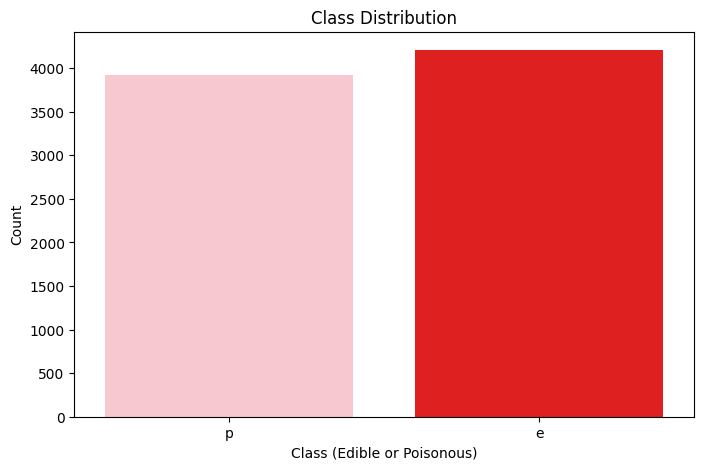

In [8]:
# Defining colors
colors = ['pink', 'red']  # Mentioning the colors

# Chart for Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df, palette=colors)
plt.title('Class Distribution')
plt.xlabel('Class (Edible or Poisonous)')
plt.ylabel('Count')
plt.show()

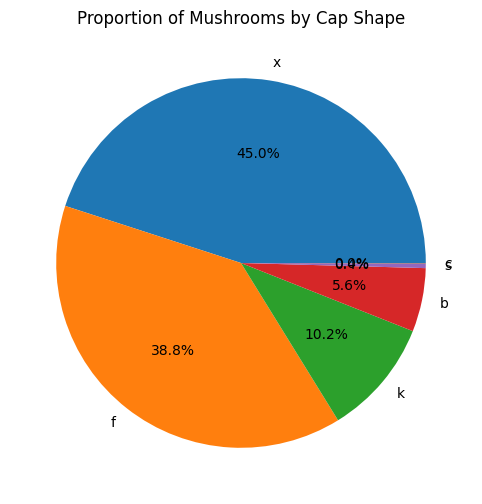

In [9]:
#  Pie Chart for cap-shape distribution
plt.figure(figsize=(8, 6))
df['cap-shape'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Mushrooms by Cap Shape')
plt.ylabel('')
plt.show()

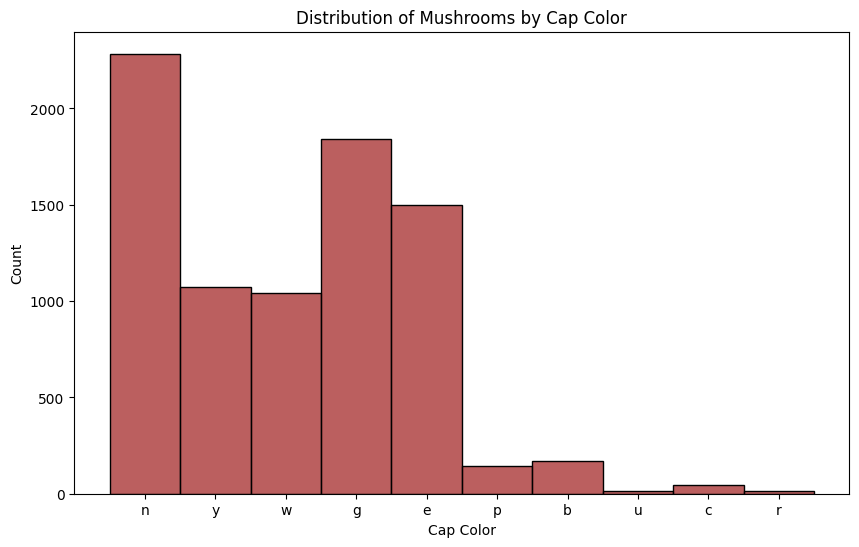

In [10]:
# Histogram for cap-color distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['cap-color'], bins=10, color='brown')
plt.title('Distribution of Mushrooms by Cap Color')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

# Applying LabelEncoder to all categorical columns
data = df.apply(LabelEncoder().fit_transform)

In [12]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting data into features and the target variable
X = data.drop('class', axis=1)
y = data['class']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initializing and training the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Performance metrics
accuracy_lr = accuracy_score(y_test, y_pred)
report_lr = classification_report(y_test, y_pred)

print("Logistic Regression Accuracy:", accuracy_lr)
print("Classification Report for Logistic Regression:")
print(report_lr)

Logistic Regression Accuracy: 0.9497784342688331
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1040
           1       0.95      0.95      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



# Support Vector Machine (SVM)

In [14]:
from sklearn.svm import SVC

# Initializing and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("Support Vector Machine Accuracy:", accuracy_svm)
print("Classification Report for Support Vector Machine:")
print(report_svm)

Support Vector Machine Accuracy: 0.9596258000984736
Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1040
           1       0.95      0.96      0.96       991

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031

